In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
class Windfarm(object):
  def __init__(self, placement, horizontal_separation, vertical_separation, rotor_radius, alpha, C_t):
    self.placement = placement
    self.horizontal_separation = horizontal_separation
    self.vertical_separation = vertical_separation
    self.rotor_radius = rotor_radius
    self.alpha = alpha

    self.number_of_rows, self.number_of_columns = placement.shape
    self.number_of_turbines = np.sum(placement)
    self.d = rotor_radius/alpha
    self.a = 0.5 - 0.5 * np.sqrt(1 - C_t)
    
    self._initialize_positions()

  def _initialize_positions(self):
    self.turbine_position = []
    
    for row in range(self.number_of_rows):
        for column in range(self.number_of_columns):
            if self.placement[row, column]:
                
                x = self.horizontal_separation * (1/2 + column)
                y = self.vertical_separation * (1/2 + row)
                self.turbine_position += [[x, y]] 
    
    self.turbine_position = np.array(self.turbine_position)

  def show(self):
    x = self.turbine_position[:, 0]/self.horizontal_separation
    y = self.turbine_position[:, 1]/self.vertical_separation
    
    plt.figure(figsize = (0.7 * self.number_of_columns, 0.7 * self.number_of_rows))
    plt.scatter(x, y, marker = 's', s = 300)
    plt.xticks(range(0, (self.number_of_columns + 1)), [])
    plt.yticks(range(0, (self.number_of_rows + 1)), [])
    plt.ylim([0, self.number_of_rows])
    plt.xlim([0, self.number_of_columns])
    plt.grid(True)
    plt.tick_params(axis = 'both', color = (0,0,0,0))
    plt.gca().invert_yaxis()

  def produced_energy(self, u):
    u_0 = np.linalg.norm(u)
    v = u/u_0
    c_1 = np.sqrt(self.alpha**2 + 1)
    c_2 = np.sqrt((1 - self.a) / (1 - 2 * self.a))
    R = (self.rotor_radius * c_2)

    L = np.zeros(self.number_of_turbines, dtype = float)

    for index, position in enumerate(self.turbine_position):
        P_0 = position - self.d * v
        P = self.turbine_position - P_0
        abs_P = np.linalg.norm(P, axis = 1)
        prod_v_P = np.dot(P, v)
        
        x = prod_v_P - self.d

        r = (1 - (2 * self.a) / (1 + self.alpha * x / R)**2)

        influenced = np.full(self.number_of_turbines, True)
        influenced &= c_1 * prod_v_P >= abs_P 
        influenced &= x > 0
        influenced[index] = False
          

        L += np.where(influenced, (1 - r)**2, 0)

    U = np.where(L != 0.0, u_0 * (1 - np.sqrt(L)), u_0)
    
    return 0.3 * np.sum(U ** 3)


In [64]:
N, M = 10, 10
placement = np.ones((N, M)) < 0.5
placement[0, :] = True
placement[5, :] = True
placement[-1, :] = True
R = 40
alpha = 0.5/np.log(60/0.3)
C_t = 0.88
farm = Windfarm(placement, 10 * R, 10 * R, R, alpha, C_t)

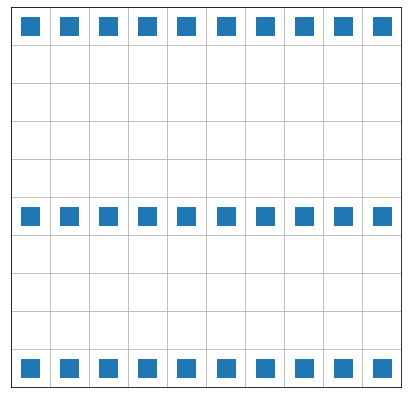

In [65]:
farm.show()

In [67]:
farm.produced_energy(12 * np.array([0, 1.0]))

14311.742380981897